In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [415]:
df = pd.read_csv('../data/titanic/titanic.csv', sep=",")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.shape # (nombre de lignes, nombre de colonnes)

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [227]:
def f1(x): 
    if str(x) == str(np.nan): 
        return np.nan
    else:
        return str(x)[0]

In [235]:
df["Len_cabin"] = df.Cabin.apply(lambda x: len(str(x)) if not str(x) == str(np.nan) else np.nan)
df["First_cabin"] = df.Cabin.apply(f1)

In [236]:
df[["Cabin", "Len_cabin", 'First_cabin']]

,Cabin,Len_cabin,First_cabin
0,NaN,NaN,NaN
1,C85,3.0,C
2,NaN,NaN,NaN
3,C123,4.0,C
4,NaN,NaN,NaN
...,...,...,...
886,NaN,NaN,NaN
887,B42,3.0,B
888,NaN,NaN,NaN
889,C148,4.0,C


In [238]:
quantitatives = ['Age', 'SibSp', 'Parch', 'Fare', 'Len_cabin']
qualitatives = ['Pclass','Sex', "Cabin", 'First_cabin']
cible = ['Survived']

## 2. Analyse unitaire
### 2.1 Analyse unitaire des variables quantitatives

In [10]:
var = quantitatives[0]

In [17]:
# Description d'une variable
df[var].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution de ma variable Age')

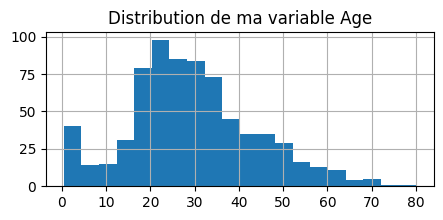

In [18]:
# Graphique 
fig, ax = plt.subplots(1,1,figsize=(5,2))
ax.hist(df[var], bins=20)
ax.grid(True)
ax.set_title(f'Distribution de ma variable {var}')

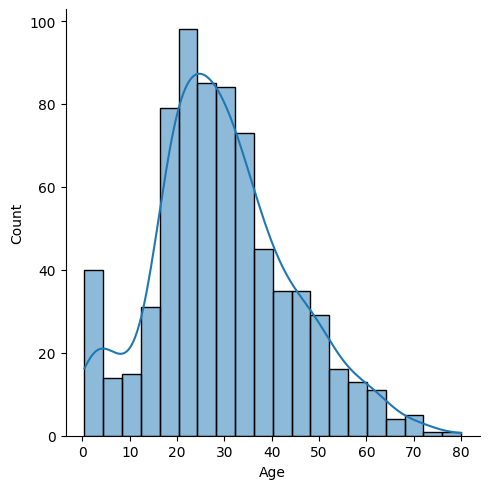

In [129]:
# avec Seaborn
#https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=df, x="Age", kde=True)

<AxesSubplot: >

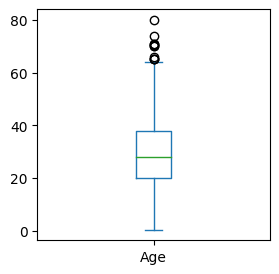

In [19]:
# Graphique 
df[var].plot(kind='box', figsize=(3,3))

### 2.1 Analyse unitaire des variables qualitatives

In [239]:
var = qualitatives[3]

In [240]:
# Compter 
(df[var].value_counts() / df[var].count()) * 100

C    28.921569
B    23.039216
D    16.176471
E    15.686275
A     7.352941
F     6.372549
G     1.960784
T     0.490196
Name: First_cabin, dtype: float64

In [241]:
dict_1 = {var : df[var].value_counts().index, 'count' : df[var].value_counts().values}
res = pd.DataFrame(dict_1)
res

,First_cabin,count
0,C,59
1,B,47
2,D,33
3,E,32
4,A,15
5,F,13
6,G,4
7,T,1


<AxesSubplot: xlabel='First_cabin'>

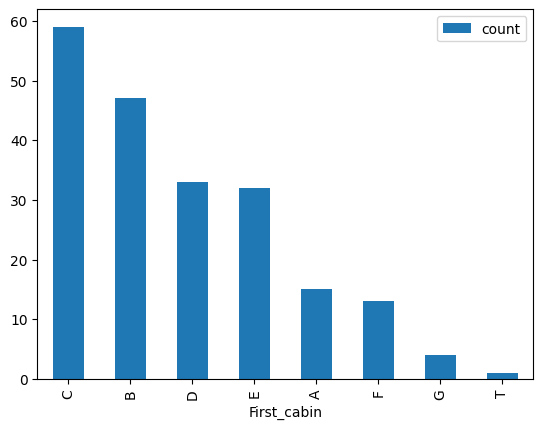

In [242]:
res.plot.bar(var, 'count')

### 2.2 Analyse croisée des variables quantitatives

/var/folders/4x/h3z3_n392rx8p7ylpv573jkh0000gp/T/ipykernel_24712/484347380.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df[['Age', 'SibSp', 'Parch', 'Fare']], \


array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot: xlabel='Parch', ylabel='Age'>,
        <AxesSubplot: xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot: xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot: xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot: xlabel='Fare', ylabel='SibSp'>],
       [<AxesSubplot: xlabel='Age', ylabel='Parch'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot: xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot: xlabel='Fare', ylabel='Parch'>],
       [<AxesSubplot: xlabel='Age', ylabel='Fare'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot: xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot: xlabel='Fare', ylabel='Fare'>]], dtype=object)

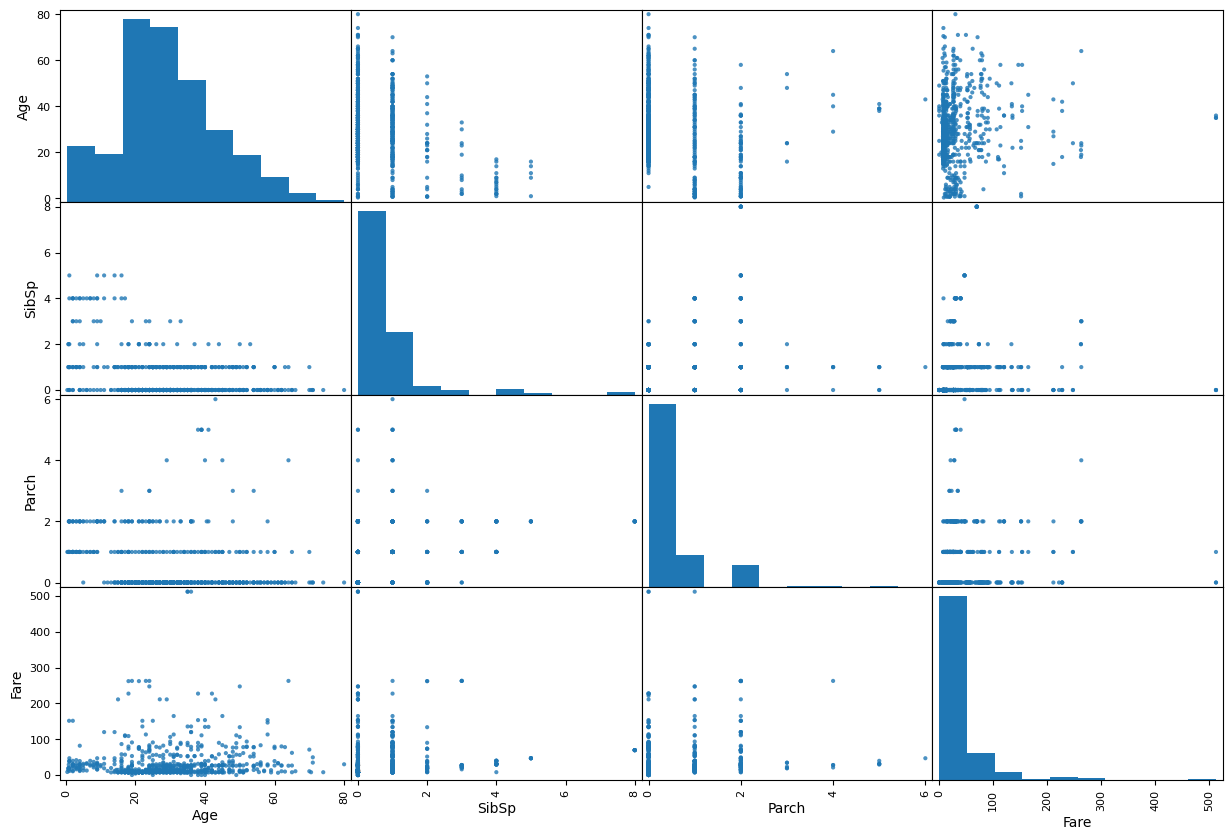

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
pd.plotting.scatter_matrix(df[['Age', 'SibSp', 'Parch', 'Fare']], \
                           diagonal='hist',
                           alpha=0.8, ax=ax)

<AxesSubplot: >

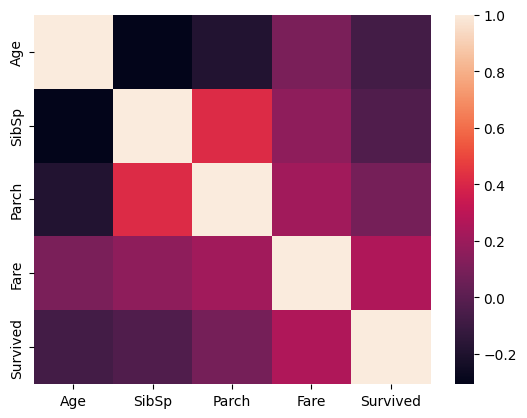

In [74]:
corr = df[quantitatives+cible].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=quantitatives+cible,
        yticklabels=quantitatives+cible)

<AxesSubplot: xlabel='Age'>

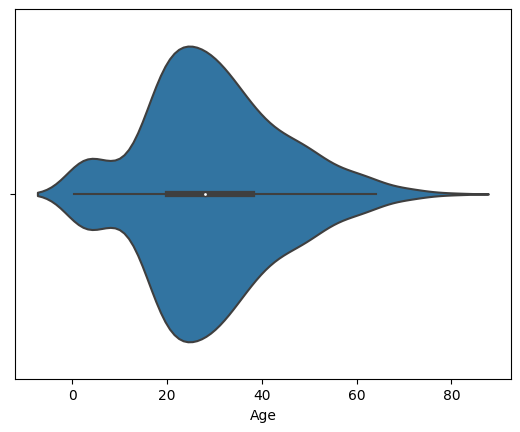

In [138]:
sns.violinplot(df, x="Age")

In [255]:
?sns.displot

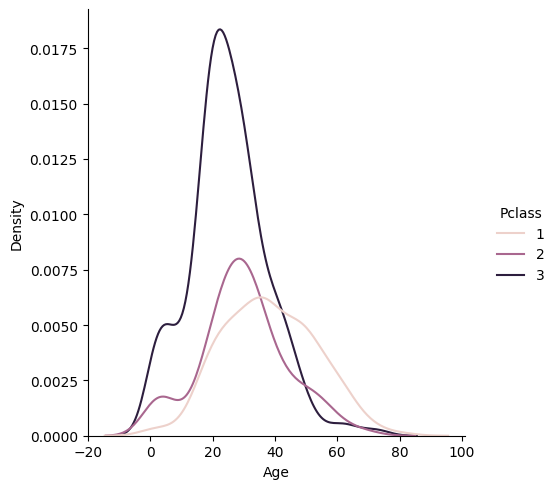

In [257]:
#https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=df, x="Age", hue="Pclass", kind='kde')

/var/folders/4x/h3z3_n392rx8p7ylpv573jkh0000gp/T/ipykernel_24712/334922635.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x="Age", hue="First_cabin", kind='kde')


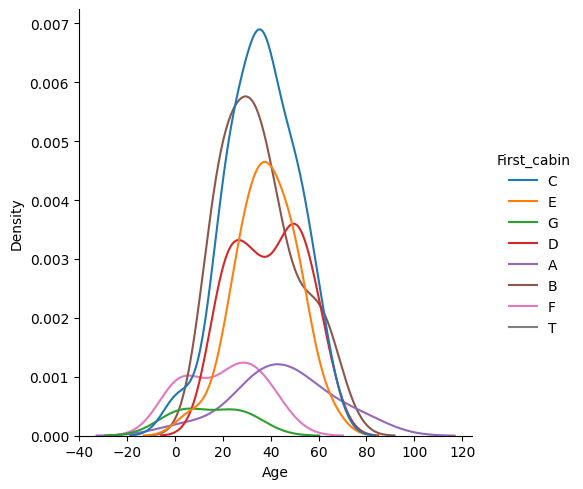

In [248]:
#https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=df, x="Age", hue="First_cabin", kind='kde')

<AxesSubplot: xlabel='First_cabin', ylabel='count'>

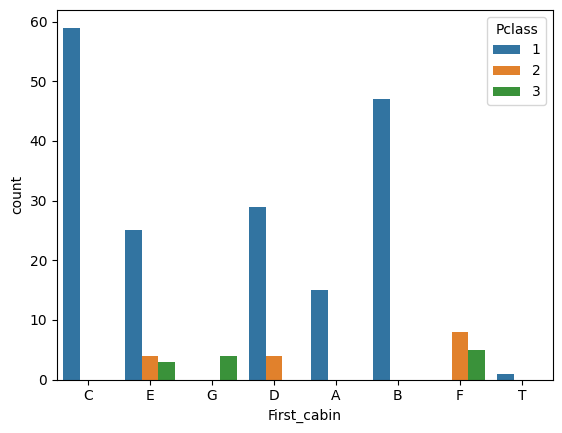

In [249]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(data=df, x="First_cabin", hue="Pclass")

<AxesSubplot: xlabel='Sex', ylabel='count'>

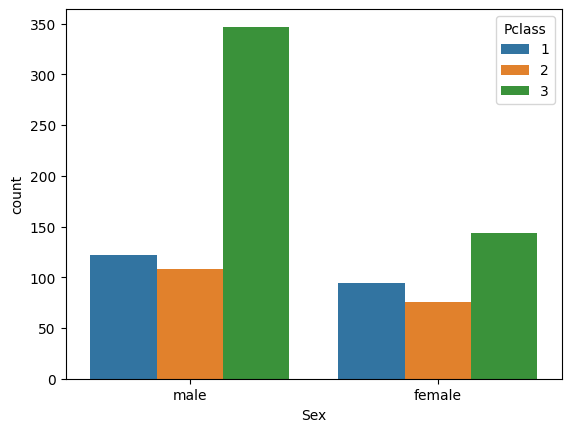

In [134]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(data=df, x="Sex", hue="Pclass")

Analyse de la variable: Sex


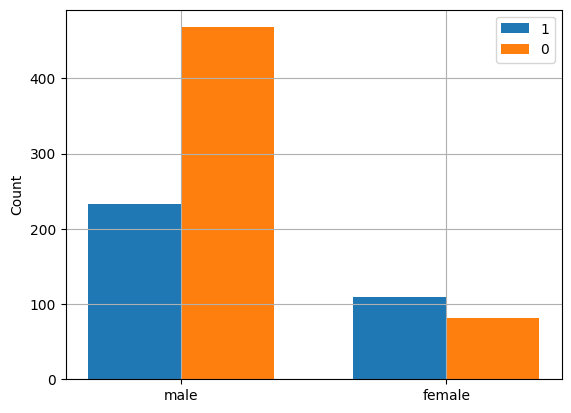

In [103]:
## variable qualitative 

name = qualitatives[1]
print(f"Analyse de la variable: {name}")

labels = df[name].value_counts().index
tmp_0 = df[df['Survived']==1]
tmp_1 = df[df['Survived']==0]

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tmp_0[name].value_counts().values, width, label='1')
rects2 = ax.bar(x + width/2, tmp_1[name].value_counts().values, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [271]:
A1 = round(df[df['Pclass']==1].Age.mean())
A2 = round(df[df['Pclass']==2].Age.mean())
A3 = round(df[df['Pclass']==3].Age.mean())
print(f"L'Age moyen des passagers de la classe 1: {A1}")
print(f"L'Age moyen des passagers de la classe 2: {A2}")
print(f"L'Age moyen des passagers de la classe 3: {A3}")

L'Age moyen des passagers de la classe 1: 38
L'Age moyen des passagers de la classe 2: 30
L'Age moyen des passagers de la classe 3: 25


In [278]:
?df.Age.replace

In [411]:
# solution 1: replace
df[df['Pclass']==1]['Age'] = df[df['Pclass']==1].Age.replace(np.nan, A1)
# ->  KO (cf. avertissement -> https://pandas.pydata.org/docs/user_guide/missing_data.html#values-considered-missing)

/var/folders/4x/h3z3_n392rx8p7ylpv573jkh0000gp/T/ipykernel_24712/4244738879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Pclass']==1]['Age'] = df[df['Pclass']==1].Age.replace(np.nan, A1)


In [421]:
# solution 1 bis:
df.loc[(df['Pclass']==1) & (df.Age.isna()), 'Age'] = A1
df.loc[(df['Pclass']==2) & (df.Age.isna()), 'Age'] = A2
df.loc[(df['Pclass']==3) & (df.Age.isna()), 'Age'] = A3

In [425]:
# solution 2: function + apply 
def f1(x): 
    if math.isnan(x):
        return A1
    else: 
        return x
    
def f2(x): 
    if math.isnan(x):
        return A2
    else: 
        return x
    
def f3(x): 
    if math.isnan(x):
        return A3
    else: 
        return x
    
df.loc[df['Pclass']==1,'Age'] = df[df['Pclass']==1].Age.apply(f1)
df.loc[df['Pclass']==2,'Age'] = df[df['Pclass']==2].Age.apply(f2)
df.loc[df['Pclass']==3,'Age'] = df[df['Pclass']==3].Age.apply(lambda x: A3 if math.isnan(x) else x)

df.Age.count(), df.Age.shape

(891, (891,))

In [424]:
df.Cabin.count(), df.Cabin.shape

(204, (891,))

In [406]:
# solution 3
df.loc[df.Pclass == 1, 'Age'] = df[df.Pclass == 1].Age.fillna(A1)
df.loc[df.Pclass == 2, 'Age'] = df[df.Pclass == 2].Age.fillna(A2)
df.loc[df.Pclass == 3, 'Age'] = df[df.Pclass == 3].Age.fillna(A3)


In [428]:
df.Age.describe()

count    891.000000
mean      29.265062
std       13.212184
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64